## 1. Import Libraries and Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.impute import SimpleImputer
import warnings
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output, display

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    ExtraTreesClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    HistGradientBoostingClassifier,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
df = pd.read_csv("cumulative.csv")
print(f"Dataset loaded successfully with shape: {df.shape}")

Dataset loaded successfully with shape: (9564, 50)


## 2. Exploratory Data Analysis (EDA)

### 2.1 Basic Information

In [3]:
print("Dataset Shape:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("\nColumn Names:")
print(df.columns.tolist())

Dataset Shape:
Rows: 9564, Columns: 50

Column Names:
['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_disposition', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2', 'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag']


In [4]:
print("Data Types:")
print(df.dtypes)

Data Types:
rowid                  int64
kepid                  int64
kepoi_name            object
kepler_name           object
koi_disposition       object
koi_pdisposition      object
koi_score            float64
koi_fpflag_nt          int64
koi_fpflag_ss          int64
koi_fpflag_co          int64
koi_fpflag_ec          int64
koi_period           float64
koi_period_err1      float64
koi_period_err2      float64
koi_time0bk          float64
koi_time0bk_err1     float64
koi_time0bk_err2     float64
koi_impact           float64
koi_impact_err1      float64
koi_impact_err2      float64
koi_duration         float64
koi_duration_err1    float64
koi_duration_err2    float64
koi_depth            float64
koi_depth_err1       float64
koi_depth_err2       float64
koi_prad             float64
koi_prad_err1        float64
koi_prad_err2        float64
koi_teq              float64
koi_teq_err1         float64
koi_teq_err2         float64
koi_insol            float64
koi_insol_err1       float64
ko

In [5]:
print("First 5 rows:")
df.head()

First 5 rows:


,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [6]:
print("Target variable distribution:")
print(df['koi_disposition'].value_counts())
print("\nPercentages:")
print(df['koi_disposition'].value_counts(normalize=True) * 100)

Target variable distribution:
koi_disposition
FALSE POSITIVE    5023
CONFIRMED         2293
CANDIDATE         2248
Name: count, dtype: int64

Percentages:
koi_disposition
FALSE POSITIVE    52.519866
CONFIRMED         23.975324
CANDIDATE         23.504810
Name: proportion, dtype: float64


### 2.2 Summary Statistics

In [7]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
print("Summary Statistics for Numerical Features:")
df[numerical_cols].describe()

Summary Statistics for Numerical Features:


,rowid,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,9564.000000,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9110.000000,9110.000000,...,9081.000000,9201.000000,9096.000000,9096.000000,9201.000000,9096.000000,9096.000000,9564.000000,9564.000000,9563.000000
mean,4782.500000,7.690628e+06,0.480829,0.188206,0.231598,0.194898,0.120033,75.671358,0.002148,-0.002148,...,-162.265059,4.310157,0.120738,-0.143161,1.728712,0.362292,-0.394806,292.060163,43.810433,14.264606
std,2761.033321,2.653459e+06,0.476928,0.390897,0.421875,0.396143,0.325018,1334.744046,0.008236,0.008236,...,72.746348,0.432606,0.132837,0.085477,6.127185,0.930870,2.168213,4.766657,3.601243,1.385448
min,1.000000,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.172500,...,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,2391.750000,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,0.000005,-0.000276,...,-198.000000,4.218000,0.042000,-0.196000,0.829000,0.129000,-0.250000,288.660770,40.777173,13.440000
50%,4782.500000,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,0.000035,-0.000035,...,-160.000000,4.438000,0.070000,-0.128000,1.000000,0.251000,-0.111000,292.261125,43.677504,14.520000
75%,7173.250000,9.873066e+06,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,0.000276,-0.000005,...,-114.000000,4.543000,0.149000,-0.088000,1.345000,0.364000,-0.069000,295.859160,46.714611,15.322000
max,9564.000000,1.293514e+07,1.000000,1.000000,1.000000,1.000000,1.000000,129995.778400,0.172500,0.000000,...,0.000000,5.364000,1.472000,0.000000,229.908000,33.091000,0.000000,301.720760,52.336010,20.003000


### 2.3 Missing Values Analysis

In [8]:
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing_data, 'Percentage': missing_percent})
missing_df = missing_df[missing_df['Missing Count'] > 0]
print("Missing Values Summary:")
print(missing_df)

Missing Values Summary:
                   Missing Count  Percentage
koi_teq_err2                9564  100.000000
koi_teq_err1                9564  100.000000
kepler_name                 7270   76.014220
koi_score                   1510   15.788373
koi_steff_err2               483    5.050188
koi_srad_err2                468    4.893350
koi_srad_err1                468    4.893350
koi_steff_err1               468    4.893350
koi_slogg_err2               468    4.893350
koi_slogg_err1               468    4.893350
koi_time0bk_err1             454    4.746968
koi_time0bk_err2             454    4.746968
koi_period_err1              454    4.746968
koi_period_err2              454    4.746968
koi_impact_err2              454    4.746968
koi_impact_err1              454    4.746968
koi_depth_err1               454    4.746968
koi_depth_err2               454    4.746968
koi_duration_err1            454    4.746968
koi_duration_err2            454    4.746968
koi_model_snr                36

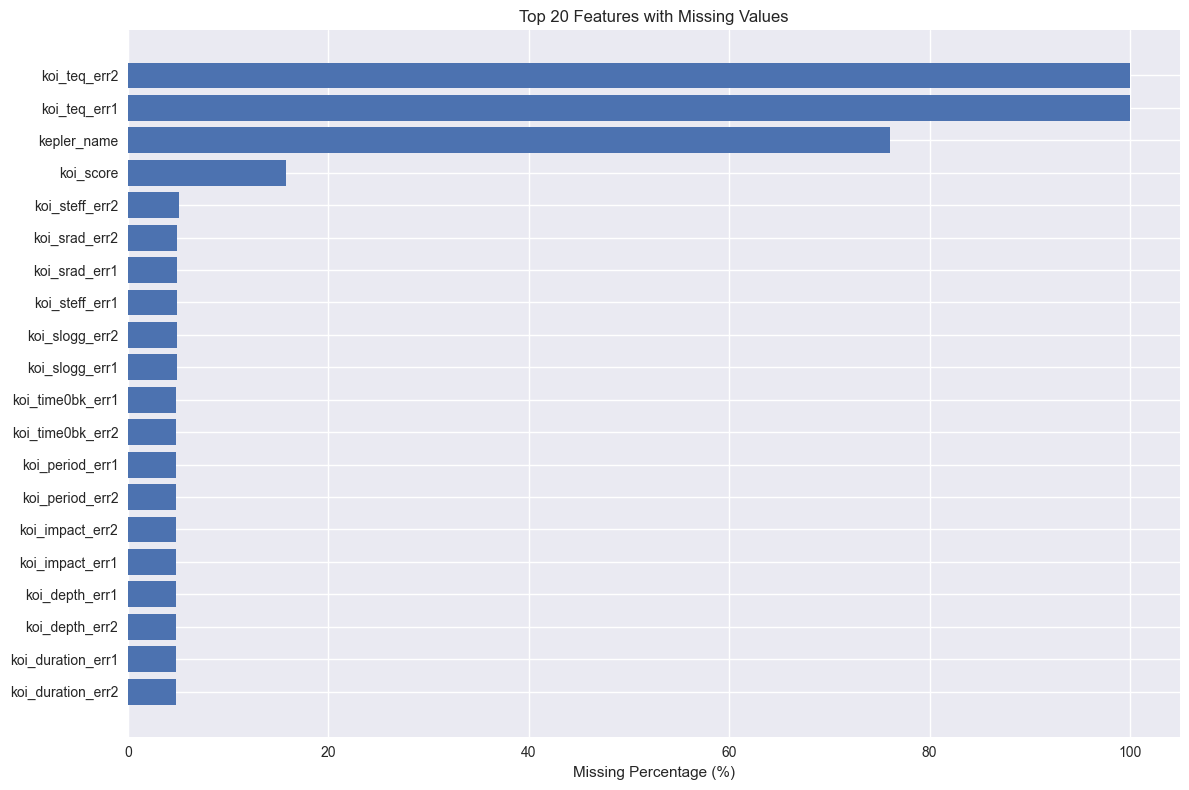

In [9]:
plt.figure(figsize=(12, 8))
missing_data_viz = missing_df.head(20)
plt.barh(range(len(missing_data_viz)), missing_data_viz['Percentage'])
plt.yticks(range(len(missing_data_viz)), missing_data_viz.index)
plt.xlabel('Missing Percentage (%)')
plt.title('Top 20 Features with Missing Values')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### 2.4 Correlation Analysis

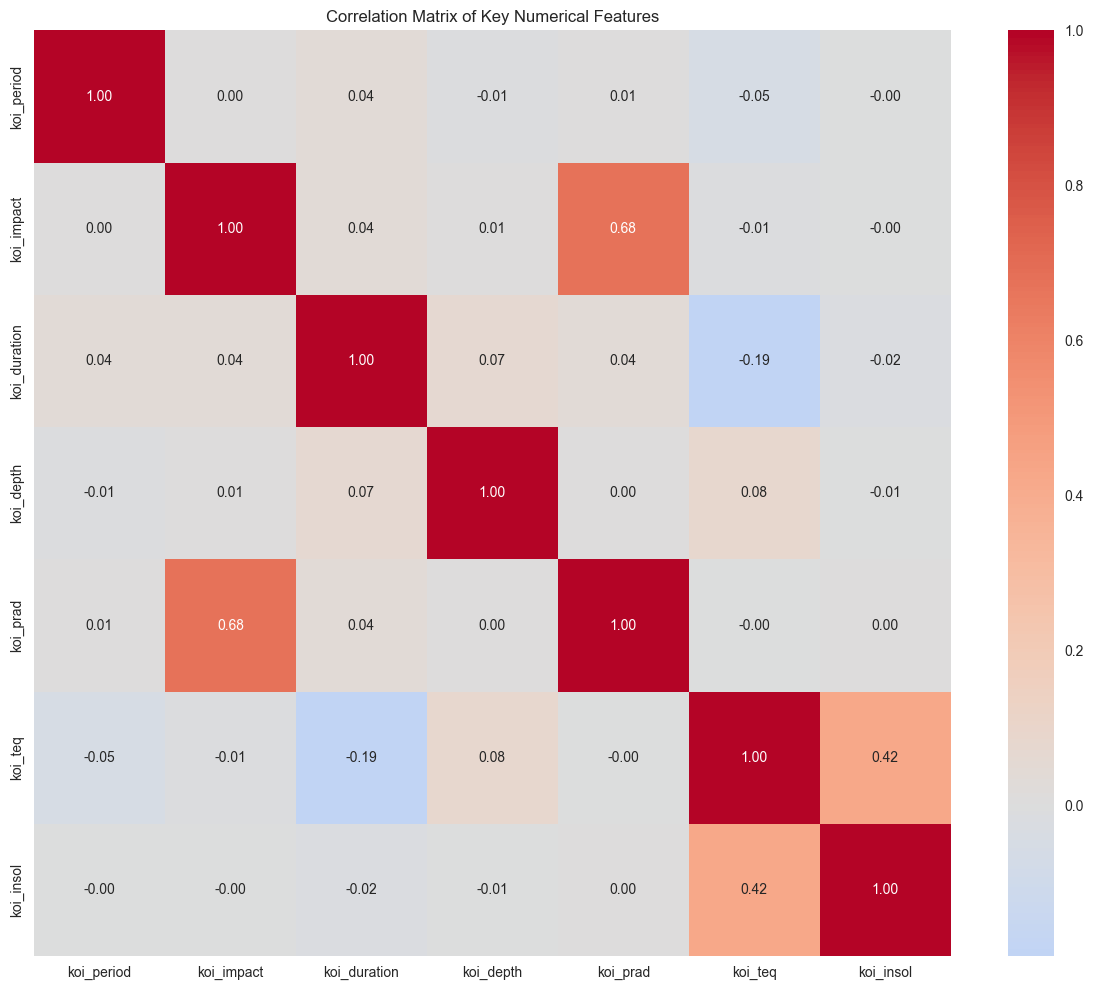

In [10]:
key_numerical_features = ['koi_period', 'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_dor']
available_features = [col for col in key_numerical_features if col in df.columns]
correlation_matrix = df[available_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Key Numerical Features')
plt.tight_layout()
plt.show()

### 2.5 Distribution Plots

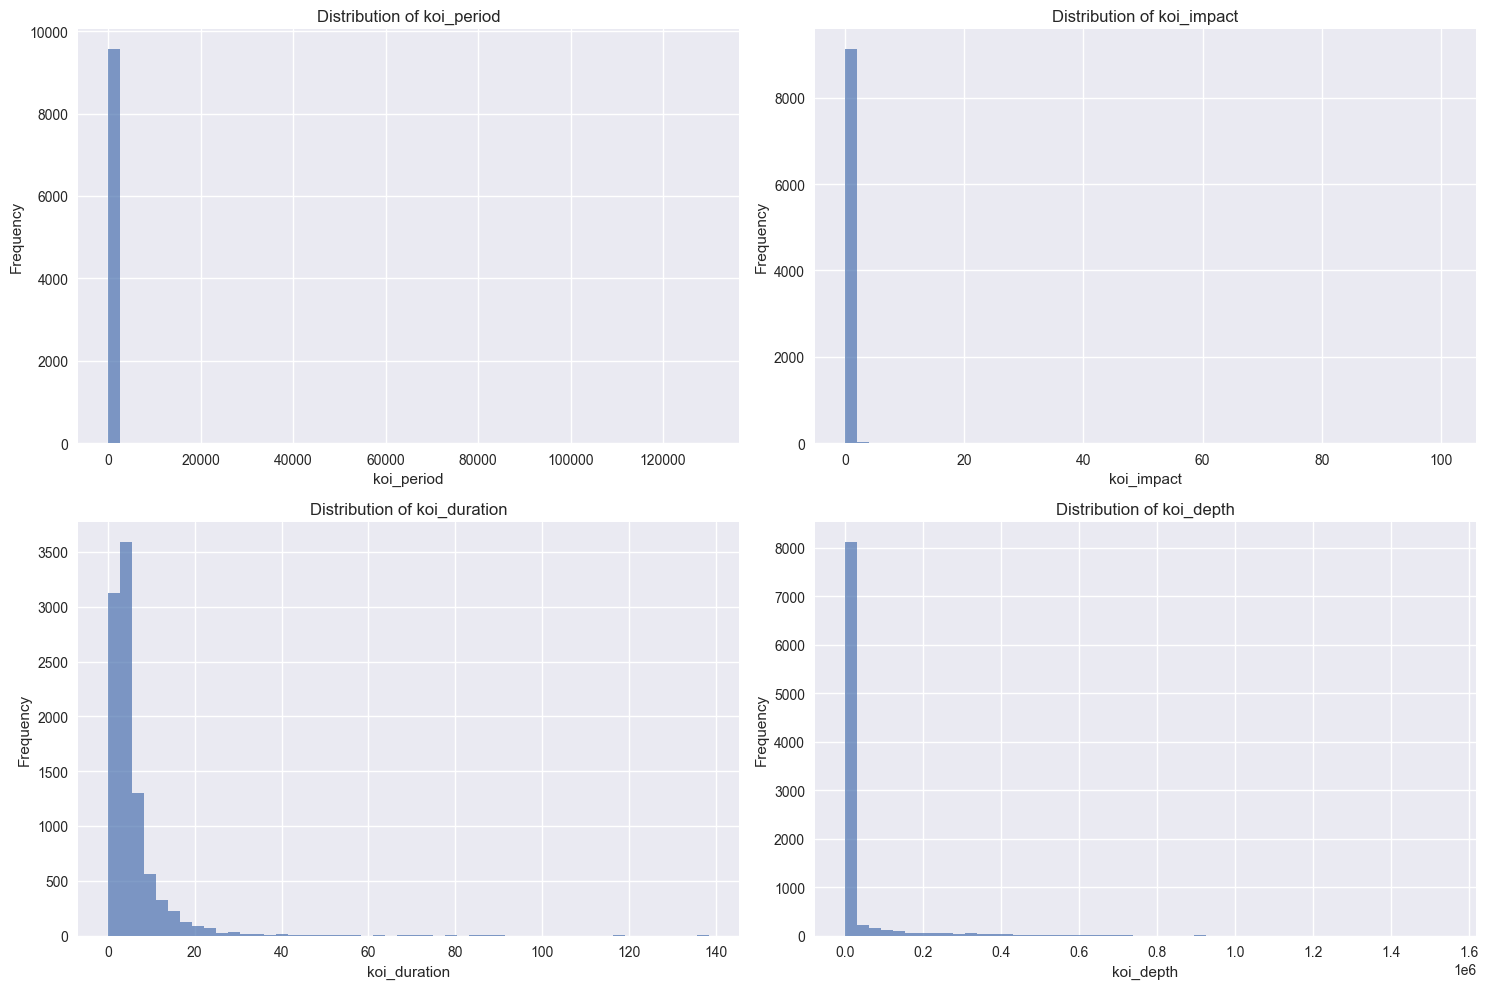

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(available_features[:4]):
    df[feature].hist(bins=50, ax=axes[i], alpha=0.7)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 3. Data Cleaning and Preprocessing

### 3.1 Target Variable Preparation

In [12]:
df_clean = df.copy()
df_clean['is_exoplanet'] = (df_clean['koi_disposition'] == 'CONFIRMED').astype(int)
print("Binary target variable created:")
print(df_clean['is_exoplanet'].value_counts())

Binary target variable created:
is_exoplanet
0    7271
1    2293
Name: count, dtype: int64


### 3.2 Feature Selection and Missing Value Handling

In [13]:
feature_columns = ['koi_period', 'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_dor', 'koi_count', 'koi_num_transits']
available_feature_columns = [col for col in feature_columns if col in df_clean.columns]
X = df_clean[available_feature_columns]
y = df_clean['is_exoplanet']

print(f"Selected {len(available_feature_columns)} features for modeling:")
print(available_feature_columns)

Selected 7 features for modeling:
['koi_period', 'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol']


In [14]:
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
print("Missing values after imputation:")
print(X_imputed.isnull().sum().sum())

Missing values after imputation:
0


### 3.3 Feature Scaling

In [15]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X_imputed.columns)
print("Features scaled successfully")
print(f"Scaled data shape: {X_scaled.shape}")

Features scaled successfully
Scaled data shape: (9564, 7)


### 3.4 Train-Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Training set target distribution:")
print(y_train.value_counts())

Training set shape: (7651, 7)
Test set shape: (1913, 7)
Training set target distribution:
is_exoplanet
0    5817
1    1834
Name: count, dtype: int64


## 4. Machine Learning Model Training

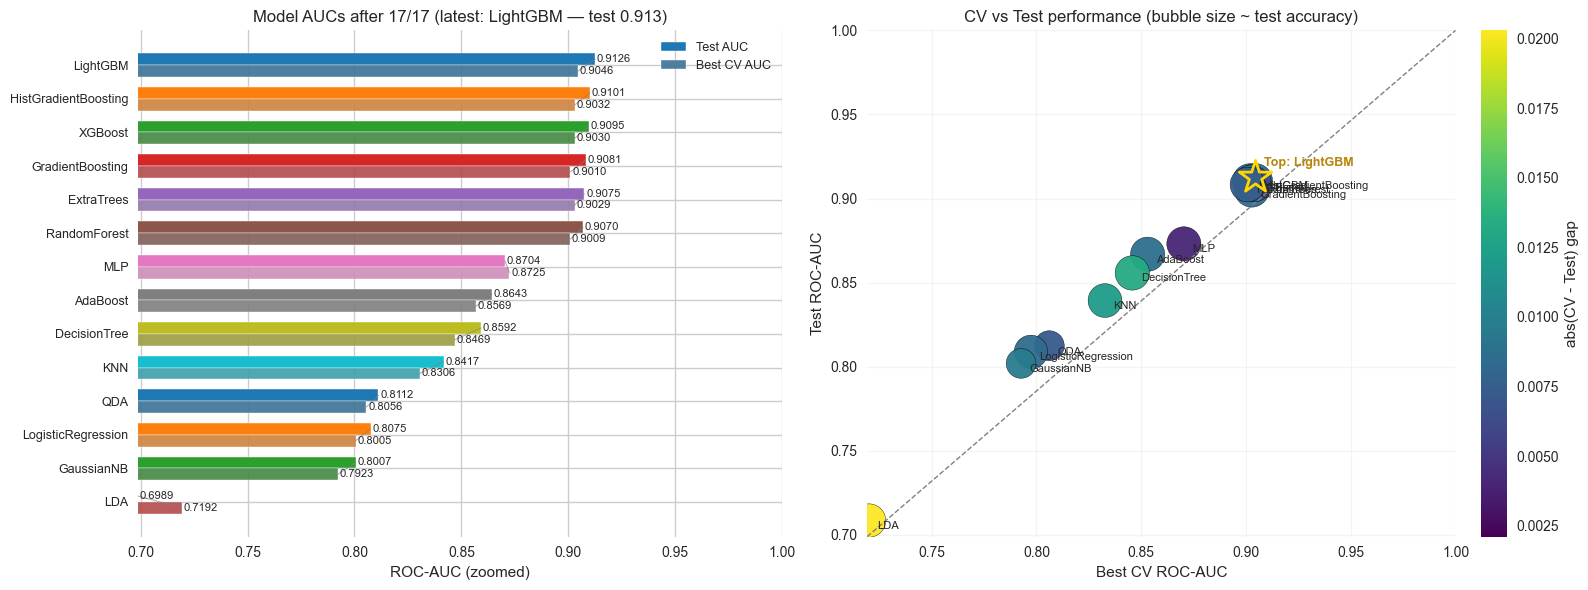

,rank_test_score,mean_test_score,std_test_score,params
5,1,0.904570,0.002494,"{'feature_fraction': 0.7852444528883149, 'lear..."
6,2,0.904282,0.002270,"{'feature_fraction': 0.6873687420594126, 'lear..."
8,3,0.903443,0.002604,"{'feature_fraction': 0.7542703315240835, 'lear..."
0,4,0.902685,0.001670,"{'feature_fraction': 0.7123620356542087, 'lear..."
2,5,0.900920,0.002412,"{'feature_fraction': 0.6174250836504598, 'lear..."
10,6,0.900093,0.002523,"{'feature_fraction': 0.884665661176, 'learning..."


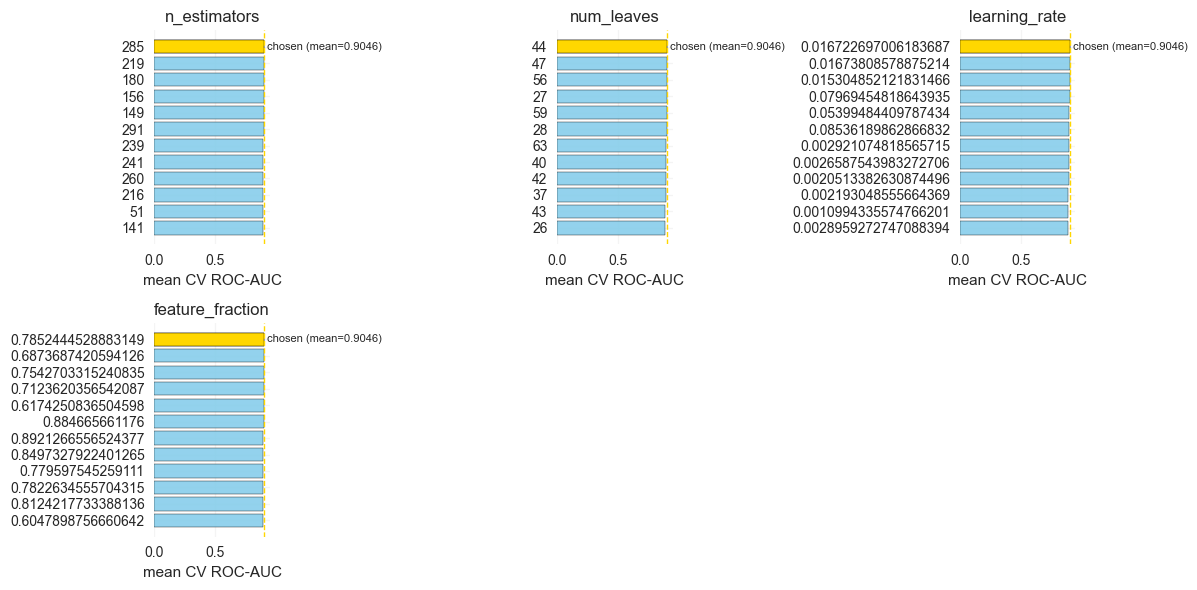

n_estimators: chosen=285 (mean CV 0.9046)
num_leaves: chosen=44 (mean CV 0.9046)
learning_rate: chosen=0.016722697006183687 (mean CV 0.9046)
feature_fraction: chosen=0.7852444528883149 (mean CV 0.9046)

Completed: LightGBM (17/17)
 best CV ROC-AUC: 0.9046
 test recall: 0.6078
 test ROC-AUC: 0.9126  test accuracy: 0.8437

 Top feature importances (current model):


koi_duration    2292
koi_period      2064
koi_depth       1998
koi_impact      1940
koi_prad        1820
koi_teq         1194
koi_insol        947
dtype: int32

,model,best_cv_score,test_auc,test_accuracy,best_params
0,LightGBM,0.904570,0.912602,0.843701,"{'feature_fraction': 0.7852444528883149, 'lear..."
1,HistGradientBoosting,0.903188,0.910119,0.841610,"{'learning_rate': 0.029106359131330698, 'max_d..."
2,XGBoost,0.903028,0.909512,0.848406,"{'colsample_bytree': 0.6174250836504598, 'lear..."
3,GradientBoosting,0.900990,0.908115,0.844224,"{'learning_rate': 0.037183641805732096, 'max_d..."
4,ExtraTrees,0.902927,0.907541,0.838474,"{'max_depth': 20, 'max_features': None, 'n_est..."
5,RandomForest,0.900915,0.906955,0.841087,"{'max_depth': 20, 'max_features': 'sqrt', 'min..."
6,MLP,0.872478,0.870379,0.804496,"{'clf__learning_rate_init': 0.001, 'clf__hidde..."
7,AdaBoost,0.856860,0.864261,0.809200,"{'learning_rate': 0.6111150117432088, 'n_estim..."
8,DecisionTree,0.846897,0.859221,0.822269,"{'max_depth': 10, 'max_features': None, 'min_s..."
9,KNN,0.830585,0.841691,0.784109,"{'clf__n_neighbors': 16, 'clf__p': 1, 'clf__we..."



Best model: LightGBM
CV ROC-AUC (best): 0.9045696961288653
Test ROC-AUC: 0.9126023021160167
[LightGBM] [Warning] feature_fraction is set=0.7852444528883149, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7852444528883149
Test recall: 0.6078431372549019
Test accuracy: 0.843700993204391

Classification report on test set:
[LightGBM] [Warning] feature_fraction is set=0.7852444528883149, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7852444528883149
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1454
           1       0.70      0.61      0.65       459

    accuracy                           0.84      1913
   macro avg       0.79      0.76      0.78      1913
weighted avg       0.84      0.84      0.84      1913


Top feature importances (best model):


koi_duration    2292
koi_period      2064
koi_depth       1998
koi_impact      1940
koi_prad        1820
koi_teq         1194
koi_insol        947
dtype: int32

In [17]:
import traceback
from sklearn.pipeline import Pipeline
from scipy.stats import randint as sp_randint, uniform as sp_uniform, loguniform as sp_loguniform

# model structure + live "why this param" inspection
candidates = {
    "LogisticRegression": (
        Pipeline([("scaler", StandardScaler()), ("clf", LogisticRegression(solver="liblinear", max_iter=500))]),
        {
            "clf__C": sp_loguniform(1e-3, 1e3), 
            "clf__penalty": ["l2"],
        },
    ),
    "SVC": (
        Pipeline([("scaler", StandardScaler()), ("clf", SVC(probability=True))]),
        {
            "clf__C": sp_loguniform(1e-2, 1e2),
            "clf__gamma": ["scale", "auto", sp_loguniform(1e-4, 1e-2)],
            "clf__kernel": ["rbf", "linear", "poly"],
            "clf__degree": [2, 3],  
        },
    ),
    "KNN": (
        Pipeline([("scaler", StandardScaler()), ("clf", KNeighborsClassifier())]),
        {
            "clf__n_neighbors": sp_randint(1, 21),  
            "clf__weights": ["uniform", "distance"],
            "clf__p": [1, 2],
        },
    ),
    "GaussianNB": (GaussianNB(), {}),
    "LDA": (LinearDiscriminantAnalysis(), {}),
    "QDA": (QuadraticDiscriminantAnalysis(), {}),
    "DecisionTree": (
        DecisionTreeClassifier(random_state=42),
        {
            "max_depth": [3, 5, 10],  
            "min_samples_split": sp_randint(2, 11),
            "max_features": [None, "sqrt"],
        },
    ),
    "RandomForest": (
        RandomForestClassifier(random_state=42, n_jobs=-1),
        {
            "n_estimators": sp_randint(50, 301),  
            "max_depth": [None, 10, 20],
            "min_samples_split": sp_randint(2, 11),
            "max_features": ["sqrt", None],
        },
    ),
    "ExtraTrees": (
        ExtraTreesClassifier(random_state=42, n_jobs=-1),
        {
            "n_estimators": sp_randint(50, 301),
            "max_depth": [None, 10, 20],
            "max_features": ["sqrt", None],
        },
    ),
    "GradientBoosting": (
        GradientBoostingClassifier(random_state=42),
        {
            "n_estimators": sp_randint(50, 201),
            "learning_rate": sp_loguniform(1e-3, 1e-1),
            "max_depth": sp_randint(3, 8),
            "subsample": sp_uniform(0.6, 0.3),
        },
    ),
    "HistGradientBoosting": (
        HistGradientBoostingClassifier(random_state=42),
        {
            "max_iter": sp_randint(100, 201),
            "learning_rate": sp_loguniform(1e-3, 1e-1),
            "max_depth": [None, 3, 5],
        },
    ),
    "AdaBoost": (
        AdaBoostClassifier(random_state=42),
        {
            "n_estimators": sp_randint(50, 201),
            "learning_rate": sp_uniform(0.01, 1.0),
        },
    ),
    "MLP": (
        Pipeline([("scaler", StandardScaler()), ("clf", MLPClassifier(max_iter=500, random_state=42))]),
        {
            "clf__hidden_layer_sizes": [(50,), (100,), (50, 50)],
            "clf__alpha": [1e-5, 1e-4, 1e-3],
            "clf__learning_rate_init": [1e-4, 1e-3],
        },
    ),
    "SGD": (
        Pipeline([("scaler", StandardScaler()), ("clf", SGDClassifier(loss="log", max_iter=2000, tol=1e-3, random_state=42))]),
        {
            "clf__alpha": sp_loguniform(1e-5, 1e-2),
            "clf__penalty": ["l2", "l1", "elasticnet", "none"],
            "clf__l1_ratio": sp_uniform(0.0, 1.0),
        },
    ),
    "CalibratedSVC": (
        Pipeline([("scaler", StandardScaler()), ("base", SVC(probability=False))]),
        {
            "base__C": sp_loguniform(1e-2, 1e1),
            "base__kernel": ["linear", "rbf"],
            "base__gamma": ["scale", "auto", sp_loguniform(1e-3, 1e-2)],
        },
    ),
}

# added XGBoost / LightGBM apart from the pipeline cus wanted to test the (try: except:) method
try:
    candidates["XGBoost"] = (
        XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42, n_jobs=-1),
        {
            "n_estimators": sp_randint(50, 301),
            "max_depth": sp_randint(3, 8),
            "learning_rate": sp_loguniform(1e-3, 1e-1), 
            "colsample_bytree": sp_uniform(0.6, 0.3),
        },
    )
except Exception:
    pass

try:
    candidates["LightGBM"] = (
        LGBMClassifier(random_state=42, n_jobs=-1),
        {
            "n_estimators": sp_randint(50, 301),
            "num_leaves": sp_randint(20, 64),
            "learning_rate": sp_loguniform(1e-3, 1e-1),
            "feature_fraction": sp_uniform(0.6, 0.3),
        },
    )
except Exception:
    pass

results = []
n_iter = 12   # random search iterations
cv = 3        # cross-validation folds
scoring = "roc_auc"
random_state = 42

def extract_inner(est):
    if isinstance(est, Pipeline):
        return est.named_steps[list(est.named_steps)[-1]]
    return est


sns.set_style("whitegrid")
plt.ioff()
rng = np.random.RandomState(random_state)

for i, (name, (estimator, param_dist)) in enumerate(candidates.items(), 1):
    # determine reasonable number of iterations when distributions are used
    if param_dist:
        try:
            # if all parameters are sequences, count total choices; otherwise fall back to n_iter
            max_choices = max(1, sum(len(v) for v in param_dist.values()))
        except Exception:
            max_choices = n_iter
    else:
        max_choices = 1

    rs = RandomizedSearchCV(
        estimator,
        param_distributions=param_dist,
        n_iter=min(n_iter, max_choices),
        scoring=scoring,
        cv=cv,
        n_jobs=-1,
        verbose=0,
        random_state=random_state,
        refit=True,
    )

    # fit (search)
    rs.error_score = "raise"
    try:
        rs.fit(X_train, y_train)
    except Exception as e:
        print(f"RandomizedSearchCV failed for {name}: {e}")
        traceback.print_exc()
        continue

    # predictions & scores
    best = rs.best_estimator_
    y_pred = best.predict(X_test)
    if hasattr(best, "predict_proba"):
        y_proba = best.predict_proba(X_test)[:, 1]
    elif hasattr(best, "decision_function"):
        y_proba = best.decision_function(X_test)
    else:
        y_proba = y_pred

    test_auc = roc_auc_score(y_test, y_proba)
    test_acc = accuracy_score(y_test, y_pred)

    results.append(
        {
            "model": name,
            "best_cv_score": rs.best_score_,
            "best_params": rs.best_params_,
            "test_auc": test_auc,
            "test_accuracy": test_acc,
            "estimator": best,
            "cv_std": np.mean(rs.cv_results_["std_test_score"]) if hasattr(rs, "cv_results_") else 0.0,
        }
    )

    cur_df = pd.DataFrame(results).sort_values("test_auc", ascending=False).reset_index(drop=True)

    # nicer live plot (main comparison)
    clear_output(wait=True)
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    palette = sns.color_palette("tab10", n_colors=len(cur_df))
    axes[0].set_title(f"Model AUCs after {i}/{len(candidates)} (latest: {name} — test {test_auc:.3f})")
    indices = np.arange(len(cur_df))
    height = 0.35

    axes[0].barh(indices - height/2, cur_df["test_auc"], height=height, color=palette, label="Test AUC")
    axes[0].barh(indices + height/2, cur_df["best_cv_score"], height=height, color=[sns.desaturate(c, 0.6) for c in palette], alpha=0.9, label="Best CV AUC")
    axes[0].set_yticks(indices)
    axes[0].set_yticklabels(cur_df["model"], fontsize=9)
    axes[0].invert_yaxis()
    axes[0].set_xlim(min(cur_df["test_auc"].min(), cur_df["best_cv_score"].min()), 1.00)
    axes[0].set_xlabel("ROC-AUC (zoomed)")
    axes[0].legend(fontsize=9)
    for idx in range(len(cur_df)):
        axes[0].text(cur_df.loc[idx, "test_auc"] + 0.0008, idx - height/2, f"{cur_df.loc[idx,'test_auc']:.4f}", va="center", fontsize=8)
        axes[0].text(cur_df.loc[idx, "best_cv_score"] + 0.0008, idx + height/2, f"{cur_df.loc[idx,'best_cv_score']:.4f}", va="center", fontsize=8)
        axes[0].plot([cur_df.loc[idx, "best_cv_score"], cur_df.loc[idx, "test_auc"]], [idx + height/2, idx - height/2], color="gray", linewidth=0.8, alpha=0.6)

    # scatter CV vs Test (bubble = accuracy)
    axes[1].set_title("CV vs Test performance (bubble size ~ test accuracy)")
    x = cur_df["best_cv_score"].values
    y = cur_df["test_auc"].values
    jitter_scale = 0.0025
    x_j = x + rng.normal(scale=jitter_scale, size=len(x))
    y_j = y + rng.normal(scale=jitter_scale, size=len(y))
    sizes = 120 + 600 * cur_df["test_accuracy"].values
    gap = np.abs(cur_df["best_cv_score"] - cur_df["test_auc"]).values
    cmap = plt.cm.get_cmap("viridis")
    colors = cmap(np.clip(gap / (gap.max() + 1e-6), 0, 1))

    sc = axes[1].scatter(x_j, y_j, s=sizes, c=colors, edgecolor="k", alpha=0.95)
    axes[1].plot([min(x), 1.0], [min(y), 1.0], ls="--", color="gray", linewidth=1)
    for j, row in cur_df.iterrows():
        axes[1].annotate(row["model"], (x_j[j], y_j[j]), xytext=(6, -6), textcoords="offset points", fontsize=8)
    if not cur_df.empty:
        top = cur_df.iloc[0]
        axes[1].scatter([top["best_cv_score"]], [top["test_auc"]], s=600, facecolors="none", edgecolors="gold", linewidths=2, marker="*", zorder=10)
        axes[1].annotate(f"Top: {top['model']}", (top["best_cv_score"], top["test_auc"]), xytext=(6, 8), textcoords="offset points", fontsize=9, weight="bold", color="darkgoldenrod")

    axes[1].set_xlabel("Best CV ROC-AUC")
    axes[1].set_ylabel("Test ROC-AUC")
    axes[1].set_xlim(min(x), 1.00)
    axes[1].set_ylim(min(y), 1.00)
    axes[1].grid(alpha=0.2)

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=gap.min(), vmax=gap.max()))
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=axes[1], fraction=0.046, pad=0.04)
    cbar.set_label("abs(CV - Test) gap")

    plt.tight_layout()
    display(fig)
    plt.close(fig)

    # Show the "self-learning" details: what the search evaluated and why it was chosen
    df_cv = pd.DataFrame(rs.cv_results_)
    display(df_cv.sort_values("rank_test_score").head(6)[["rank_test_score", "mean_test_score", "std_test_score", "params"]])

    # plot aggregated effect for each hyperparameter we searched
    if param_dist:
        # small grid of plots (one per hyperparameter)
        keys = list(param_dist.keys())
        n_plots = len(keys)
        ncols = min(3, n_plots) if n_plots else 1
        nrows = int(np.ceil(n_plots / ncols)) if n_plots else 1
        fig2, axs2 = plt.subplots(nrows, ncols, figsize=(4 * ncols, 3 * max(1, nrows)))
        axs2 = np.array(axs2).reshape(-1) if n_plots > 1 else [axs2]  # flat list
        for ax_idx, p in enumerate(keys):
            axp = axs2[ax_idx]
            col = f"param_{p}"
            if col in df_cv:
                # aggregate mean score per value
                agg = df_cv.groupby(col)["mean_test_score"].agg(["mean", "std"]).sort_values("mean", ascending=True)
                # convert index to string for plotting clarity
                agg_idx = agg.index.astype(str)
                axp.barh(agg_idx, agg["mean"], xerr=agg["std"], color="skyblue", edgecolor="k", alpha=0.9)
                axp.set_title(p)
                axp.set_xlabel("mean CV ROC-AUC")
                # annotate chosen
                chosen_val = rs.best_params_.get(p, None)
                if chosen_val is not None:
                    axp.axvline(rs.best_score_, color="gold", linestyle="--", linewidth=1)
                    # try to highlight chosen entry
                    try:
                        match_mask = agg.index.astype(str) == str(chosen_val)
                        if match_mask.any():
                            matched_idx = agg.index[match_mask][0]
                            chosen_mean = agg.loc[matched_idx, "mean"]
                            axp.barh(str(matched_idx), chosen_mean, color="gold", edgecolor="k")
                            axp.text(chosen_mean + 1e-4, list(match_mask).index(True), f" chosen (mean={chosen_mean:.4f})", va="center", fontsize=8)
                    except Exception:
                        pass
            else:
                axp.text(0.5, 0.5, "no data", ha="center")
            axp.grid(alpha=0.2)
        # hide unused axes
        for k in range(len(keys), len(axs2)):
            axs2[k].axis("off")
        plt.tight_layout()
        display(fig2)
        plt.close(fig2)

        # textual rationale per hyperparameter
        for p in keys:
            col = f"param_{p}"
            if col in df_cv:
                best_val = rs.best_params_.get(p, None)
                # mean score of chosen val
                sel_mean = df_cv[df_cv[col] == best_val]["mean_test_score"].mean() if best_val is not None else None
                print(f"{p}: chosen={best_val} (mean CV {sel_mean:.4f})" if sel_mean is not None else f"{p}: chosen={best_val}")
            else:
                print(f"{p}: (no per-value breakdown available)")

    # short model summary and feature importances
    print(f"\nCompleted: {name} ({i}/{len(candidates)})")
    print(" best CV ROC-AUC:", f"{rs.best_score_:.4f}")
    print(" test recall:", f"{recall_score(y_test, y_pred):.4f}")
    print(" test ROC-AUC:", f"{test_auc:.4f}", " test accuracy:", f"{test_acc:.4f}")

    inner = extract_inner(best)
    if hasattr(inner, "feature_importances_"):
        importances = inner.feature_importances_
        feat_series = pd.Series(importances, index=X.columns).sort_values(ascending=False)
        print("\n Top feature importances (current model):")
        display(feat_series.head(10))

    time.sleep(0.15)

results_df = pd.DataFrame(results).sort_values("test_auc", ascending=False).reset_index(drop=True)
display(results_df[["model", "best_cv_score", "test_auc", "test_accuracy", "best_params"]])

best_row = results_df.loc[0]
best_model = best_row["estimator"]
print(f"\nBest model: {best_row['model']}")
print("CV ROC-AUC (best):", best_row["best_cv_score"])
print("Test ROC-AUC:", best_row["test_auc"])
print("Test recall:", recall_score(y_test, best_model.predict(X_test)))
print("Test accuracy:", best_row["test_accuracy"])
print("\nClassification report on test set:")
print(classification_report(y_test, best_model.predict(X_test)))

inner = extract_inner(best_model)
if hasattr(inner, "feature_importances_"):
    importances = inner.feature_importances_
    feat_series = pd.Series(importances, index=X.columns).sort_values(ascending=False)
    print("\nTop feature importances (best model):")
    display(feat_series.head(15))

best_estimator = best_model
results_summary = results_df


## 5. Visualizations

### 5.1 Confusion Matrices

[LightGBM] [Warning] feature_fraction is set=0.7852444528883149, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7852444528883149


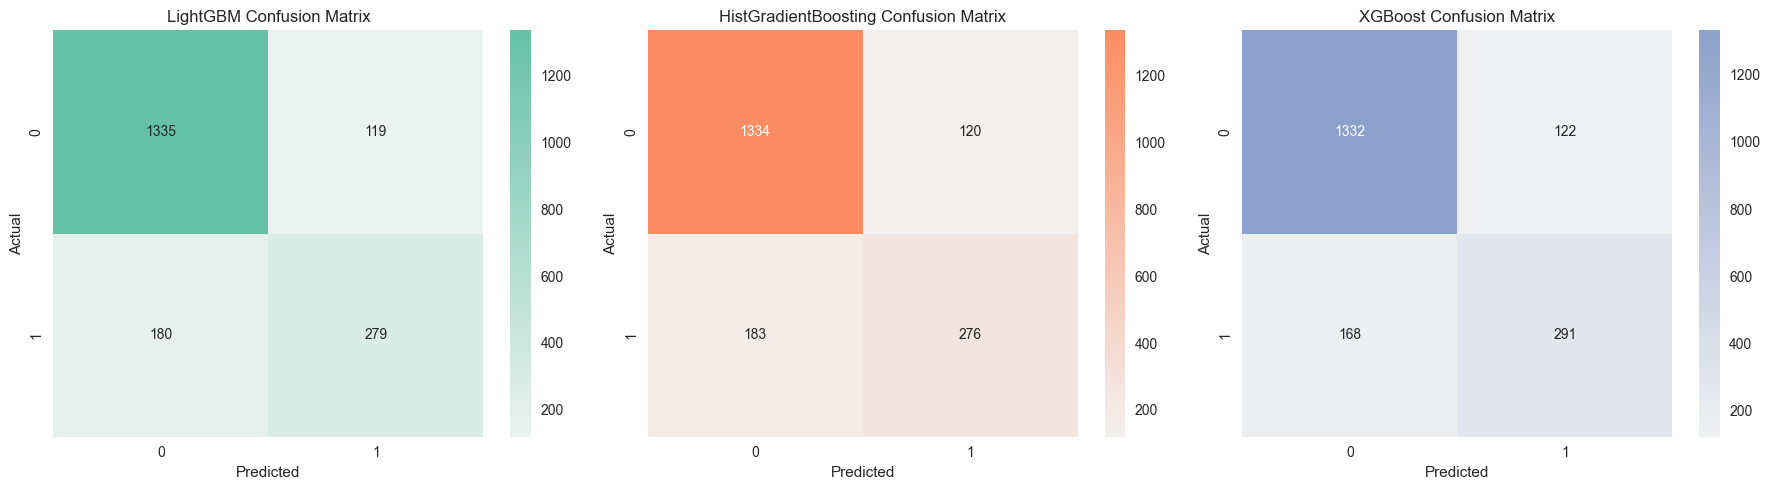

In [18]:
top3 = results_df.head(3)
model_names = top3['model'].tolist()
estimators = top3['estimator'].tolist()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
colors = sns.color_palette("Set2", n_colors=3)

for i, (name, est) in enumerate(zip(model_names, estimators)):
    y_pred = est.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap=sns.light_palette(colors[i], as_cmap=True), ax=axes[i])
    axes[i].set_title(f'{name} Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

### 5.2 ROC Curve Comparison

[LightGBM] [Warning] feature_fraction is set=0.7852444528883149, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7852444528883149


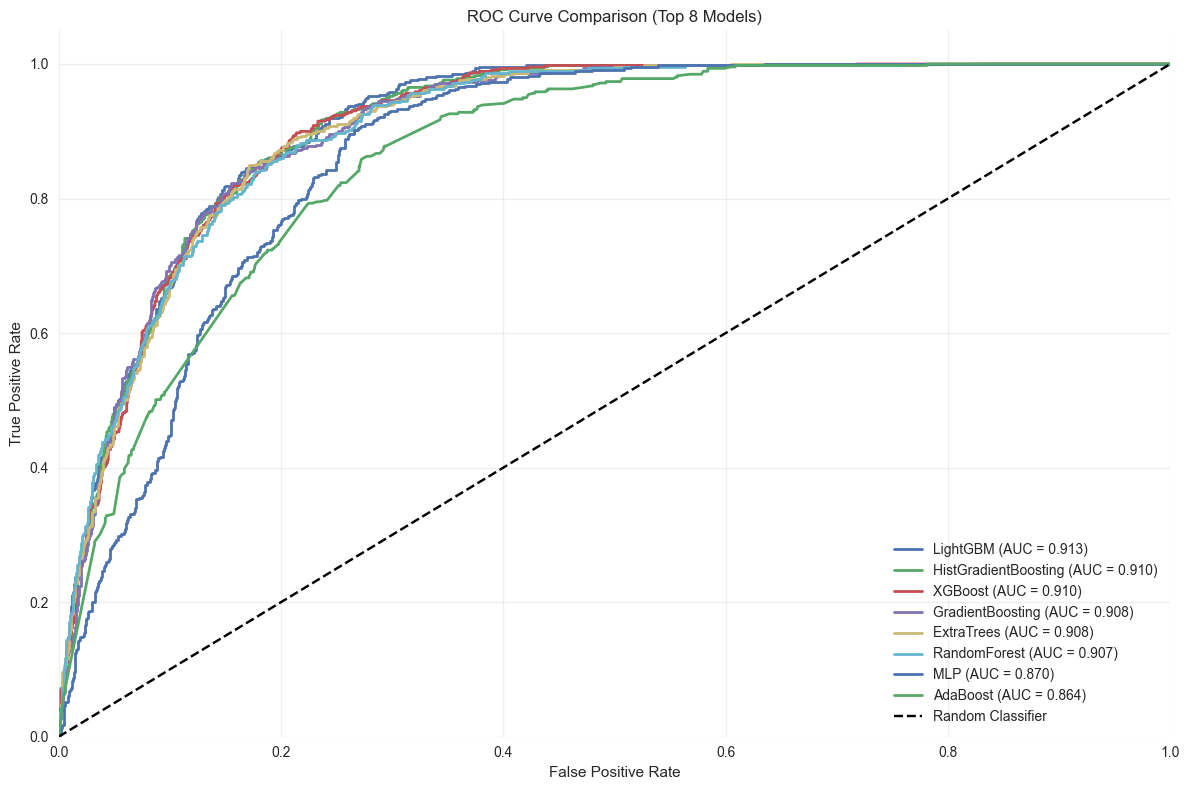

In [19]:
plt.figure(figsize=(12, 8))

for idx in range(8):
    row = results_df.iloc[idx]
    model = row['model']
    estimator = row['estimator']
    # Get predicted probabilities (or decision function)
    if hasattr(estimator, "predict_proba"):
        y_proba = estimator.predict_proba(X_test)[:, 1]
    elif hasattr(estimator, "decision_function"):
        y_proba = estimator.decision_function(X_test)
    else:
        y_proba = estimator.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model} (AUC = {roc_auc:.3f})", linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (Top 8 Models)')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 5.3 Feature Importance (Random Forest)

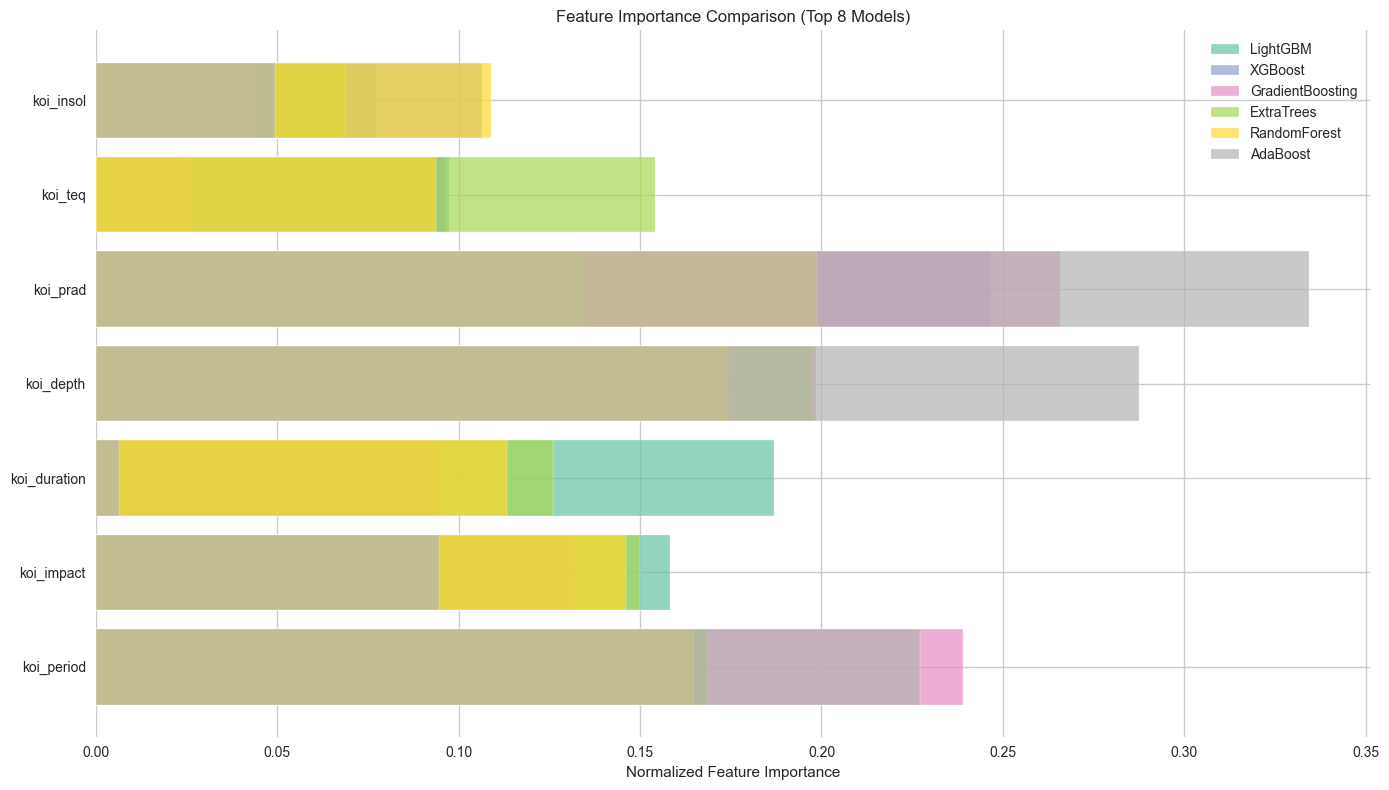


Top 5 features for LightGBM:


,feature,importance
2,koi_duration,2292
0,koi_period,2064
3,koi_depth,1998
1,koi_impact,1940
4,koi_prad,1820



Top 5 features for XGBoost:


,feature,importance
4,koi_prad,0.246670
3,koi_depth,0.170939
0,koi_period,0.162110
1,koi_impact,0.122237
6,koi_insol,0.106459



Top 5 features for GradientBoosting:


,feature,importance
4,koi_prad,0.265606
0,koi_period,0.239072
3,koi_depth,0.198512
1,koi_impact,0.131877
2,koi_duration,0.095485



Top 5 features for ExtraTrees:


,feature,importance
3,koi_depth,0.197636
0,koi_period,0.168804
5,koi_teq,0.154021
1,koi_impact,0.150085
4,koi_prad,0.134729



Top 5 features for RandomForest:


,feature,importance
4,koi_prad,0.198723
3,koi_depth,0.174126
0,koi_period,0.164758
1,koi_impact,0.146176
2,koi_duration,0.113471



Top 5 features for AdaBoost:


,feature,importance
4,koi_prad,0.334416
3,koi_depth,0.287576
0,koi_period,0.227234
1,koi_impact,0.094732
6,koi_insol,0.049554


In [20]:
top8 = results_df.head(8)
feature_names = X_train.columns

palette = sns.color_palette("Set2", n_colors=8)

plt.figure(figsize=(14, 8))

for i, row in top8.iterrows():
    model_name = row['model']
    estimator = row['estimator']

    if hasattr(estimator, "feature_importances_"):
        importances = estimator.feature_importances_
    elif hasattr(estimator, "coef_"):
        importances = np.abs(estimator.coef_[0])
    else:
        continue
    importances = importances / importances.sum()
    plt.barh(feature_names, importances, alpha=0.7, label=model_name, color=palette[i])

plt.xlabel("Normalized Feature Importance")
plt.title("Feature Importance Comparison (Top 8 Models)")
plt.legend()
plt.tight_layout()
plt.show()

# Show top 5 features for each model
for i, row in top8.iterrows():
    model_name = row['model']
    estimator = row['estimator']
    if hasattr(estimator, "feature_importances_"):
        importances = estimator.feature_importances_
    elif hasattr(estimator, "coef_"):
        importances = np.abs(estimator.coef_[0])
    else:
        continue
    feature_imp_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    }).sort_values('importance', ascending=False)
    print(f"\nTop 5 features for {model_name}:")
    display(feature_imp_df.head(5))

## 6. Best Model Selection and Final Results

In [21]:
from sklearn.metrics import recall_score

best_row = results_df.iloc[0]
best_model_name = best_row['model']
best_metrics = {
    'Accuracy': best_row['test_accuracy'],
    'AUC': best_row['test_auc'],
    'CV ROC-AUC': best_row['best_cv_score']
}
best_params = best_row['best_params']
# Convert any numpy.float64 values in best_params to native Python float for cleaner display
def convert_npfloat_to_float(params):
    if isinstance(params, dict):
        return {k: float(v) if isinstance(v, np.floating) else v for k, v in params.items()}
    return params

best_params = convert_npfloat_to_float(best_params)
print("=" * 50)
print("FINAL RESULTS")
print("=" * 50)
print(f"Best Performing Model: {best_model_name}")
print(f"\nBest Hyperparameters:\n{best_params}")
recall = recall_score(y_test, best_row['estimator'].predict(X_test))
print(f"Recall: {recall:.4f}")
print(f"\nFinal Performance Metrics:")
for metric, value in best_metrics.items():
    print(f"{metric}: {value:.4f}")
print("=" * 50)

FINAL RESULTS
Best Performing Model: LightGBM

Best Hyperparameters:
{'feature_fraction': 0.7852444528883149, 'learning_rate': 0.016722697006183687, 'n_estimators': 285, 'num_leaves': 44}
[LightGBM] [Warning] feature_fraction is set=0.7852444528883149, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7852444528883149
Recall: 0.6078

Final Performance Metrics:
Accuracy: 0.8437
AUC: 0.9126
CV ROC-AUC: 0.9046
